## 1. Simple Visualization for mxnet

In [1]:
# https://mxnet.incubator.apache.org/faq/visualize_graph.html
import mxnet as mx
user = mx.symbol.Variable('user')
item = mx.symbol.Variable('item')
score = mx.symbol.Variable('score')

/home/dluser1/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


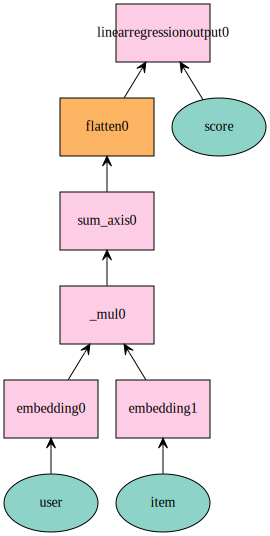

In [2]:
# Set dummy dimensions
k = 64
max_user = 100
max_item = 50

# user feature lookup
user = mx.symbol.Embedding(data = user, input_dim = max_user, output_dim = k)

# item feature lookup
item = mx.symbol.Embedding(data = item, input_dim = max_item, output_dim = k)

# predict by the inner product, which is elementwise product and then sum
net = user * item
net = mx.symbol.sum_axis(data = net, axis = 1)
net = mx.symbol.Flatten(data = net)

# loss layer
net = mx.symbol.LinearRegressionOutput(data = net, label = score)

# Visualize your network
mx.viz.plot_network(net)

## 2. Visualization for mxnet network

http://josephpcohen.com/w/visualizing-cnn-architectures-side-by-side-with-mxnet/

In [ ]:
# Bug : for how to visualize inception-v3
import find_mxnet
import mxnet as mx
import importlib

name = "inception-v3"
net = importlib.import_module("symbol_" + name).get_symbol(2)
a = mx.viz.plot_network(net, shape={"data":(1, 1, 299, 299)}, node_attrs={"shape":'rect',"fixedsize":'false'})
a.render(name)